# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [101]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [21]:
import numpy as np
import math
from scipy import optimize
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
#We define the parameters
m=1
t0=0.4
t1=0.1
k=0.4
w=1
epsilon=0.3
v=10
l = range(0,1)

def ufunc(l,x,v=10,epsilon=0.3):
    return math.log(x)-v*((l**(1+1/epsilon))/(1+1/epsilon))

# a. objective funciton (to minimize)
def value_of_choice(l,x,m,w,t0,t1,k,v,epsilon):
    x = m + w*l-(t0*w*l + t1*max(w*l-k,0))
    return -ufunc(l,x,v,epsilon)

# b. call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,l,method='bounded',
    bounds=(0,1),args=(l,m,w,t0,t1,k,v,epsilon))

# c. unpack solution
l = sol_case1.x
x = m + w*l-(t0*w*l + t1*max(w*l-k,0))
u = ufunc(l,x,v=10,epsilon=0.3)

print(f'Optimal labour supply: {l:.2f}')
print(f'Optimal consumption: {x:.2f}')
print(f'Utility: {u:.2f}')

Optimal labour supply: 0.40
Optimal consumption: 1.24
Utility: 0.17


# Question 2

ADD ANSWER.

<function matplotlib.pyplot.show(*args, **kw)>

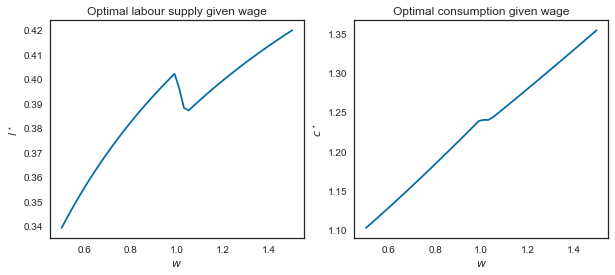

In [51]:
N=50
w_values = np.linspace(0.5,1.5,N)
l_values = np.empty(N)
x_values = np.empty(N)

def constraint(l,w):
    cons = m + w*l-(t0*w*l + t1*max(w*l-k,0))
    return cons

for i,w in enumerate(w_values):
    result = optimize.minimize_scalar(value_of_choice,bounds=(0,1),args=(l,m,w,t0,t1,k,v,epsilon),method="bounded")
    l_values[i] = result.x
    x_values[i] = constraint(l_values[i],w)

plt.style.use('seaborn-white')
fig = plt.figure(figsize=(10,4))

#subplot 1
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_values,l_values)


ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')

#subplot 2
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_values,x_values)


ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')

plt.show

# Question 3

ADD ANSWER.

In [4]:
# code

# Question 4

ADD ANSWER.

In [5]:
# code

# Question 5

ADD ANSWER.

In [6]:
# code

# Conclusion

ADD CONCISE CONLUSION.